# [Capstone Project] ML for Healthcare




## Introduction

You are supposed to program in Python to analyze a real-world dataset.

### Rule to complete the assignment
The basic rule is to write down your code after Each **TODO** line. There's **no limitation** on what libraries you use, how many lines code you write, how many cells you use in JupyterNotebook, etc.

### Grading
The grade will be given based on the performance of your model on a testing dataset. Note, this **testing dataset** is private to the instructor and TA. As a student, you don't have access to the test dataset. What you can do is to refine or polish your model based on the **training** and **validation** set. Submit the best model you have.

# Overview
We will delve into the practical application of Artificial Intelligence within the field of healthcare.
This lab will include:
- Dataset introduction
- Preprocessing
- Problem definition
- Feature engineering
- Model selection
- Training the model
- Validation and hyperparameter tuning
- Evaluation metrics


## Dataset introduction
For this lab, we will take one ECG dataset as example from the UCR Time Series Classification Archive.

### **UCR Time Series Classification Archive**  
Maintained by the University of California, Riverside (UCR), it is a valuable resource and repository for time series data and related classification problems. This archive is a comprehensive collection of various time series datasets designed specifically for benchmarking and evaluating time series classification algorithms and methods.
FYI, the whole UCR raw data download link: https://www.cs.ucr.edu/%7Eeamonn/time_series_data_2018/

But in this lab, you don't need it. **Please download the ECG5000 dataset on Canvas under the module of [Lab] Applied AI in Healthcare.**

### **ECG5000**  
> The original data set for *ECG5000* is a 20-hour long ECG downloaded from Physionet_ATM [1]. The database is BIDMC Congestive Heart Failure Database(chfdb) and the record is chf07. It was originally published by Goldberger et al. [2]. The data were pre-processed in two steps, first extracting each heartbeat and then making each heartbeat equal length using interpolation. These data were originally used by Chen et al. [3]. After that, 5000 heartbeats were randomly selected to make the current data set. Data were from a patient who has severe congestive heart failure. The class values were obtained by automated annotation.

>[1] https://physionet.org/cgi-bin/atm/ATM  
>[2] Goldberger, Ary L., et al. "PhysioBank, PhysioToolkit, and PhysioNet: components of a new research resource for complex physiologic signals." Circulation 101.23 (2000): e215-e220.  
>[3] Chen, Yanping, et al. "A general framework for never-ending learning from time series streams." Data Mining and Knowledge Discovery 29.6 (2015): 1622-1664.  
>[4] http://www.timeseriesclassification.com/description.php?Dataset=ECG5000

|                 Class name                 | Abbreviation |
|:------------------------------------------:|:------------:|
|                   Normal                   |       N      |            
|  R-on-T premature ventricular contraction  |       r      |             
| Supraventricular premature or ectopic beat |       S      |           
|      Premature ventricular contraction     |       V      |            
|             Unclassifiable beat            |       Q      |      

## TODO 1 Load the dataset (2 points)

0. Download the ECG5000 dataset on Canvas under the module of [Lab] Applied AI in Healthcare. Put the folder at the same path as your Jupyter code (aka, this file). In other words, th path should be *ECG5000/ECG5000_train.pickle* when loading the data in this file.

After my modification, the dataset contains 5000 samples, 500 in training, 1500 in validation, and 3000 for testing. **However, the testing set is unaviliable to you!** The testing set is used to evaluate your model and grading.

Your task is to train your model on the training set and evaluate your model on the validation set.

1. Load the *ECG5000_train.pickle* and *ECG5000_validation.pickle* file, save the file into variable *ECGdataset*.

2. Print out the first Sample, only the first sample.

3. What the value of the first feature of the 10-th sample? Print it out.

**Note:** The time series length of ECG5000 is 140 which is the feature, the labels is the first column of the dataset array.











In [1]:
import pickle
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

In [2]:
ECGdataset_trn = pickle.load(open('ECG5000/ECG5000_train.pickle', "rb"), encoding='latin1')
ECGdataset_vld = pickle.load(open('ECG5000/ECG5000_validation.pickle', "rb"), encoding='latin1')




In [3]:
first_sample = ECGdataset_trn[0]
first_sample

array([ 0.        , -0.11252183, -2.8272038 , -3.7738969 , -4.3497511 ,
       -4.376041  , -3.4749863 , -2.1814082 , -1.8182865 , -1.2505219 ,
       -0.47749208, -0.36380791, -0.49195659, -0.42185509, -0.30920086,
       -0.4959387 , -0.34211867, -0.35533627, -0.36791303, -0.31650279,
       -0.41237405, -0.47167181, -0.41345783, -0.36461703, -0.44929829,
       -0.47141866, -0.42477658, -0.46251673, -0.55247236, -0.47537519,
       -0.6942    , -0.7018681 , -0.59381178, -0.66068415, -0.71383066,
       -0.76980688, -0.67228161, -0.65367605, -0.63940562, -0.55930228,
       -0.59167032, -0.49322332, -0.46305183, -0.30164382, -0.23273401,
       -0.12505488, -0.15394314, -0.0243574 , -0.06560876,  0.03499926,
        0.06193522,  0.07119542,  0.12392505,  0.10312371,  0.22522849,
        0.12868305,  0.30248315,  0.25727621,  0.19635161,  0.17938297,
        0.24472863,  0.34121687,  0.32820441,  0.40604169,  0.44660507,
        0.42406823,  0.48151204,  0.4778438 ,  0.62408259,  0.57

In [4]:
sample_10th_feature = ECGdataset_trn[9]
sample_10th_feature[0]

0.0

## TODO 2 Preprocessing (4 points)

1. Normalize each sample (features) following the time-dimention, using the *sklearn.preprocessing.StandardScaler* function. Please remember to install and import the *sklearn* library.

2. Note, as the training and validation sets are already splitted into two different files, you need to do the preprocessing for them independently (seperately).

In [5]:
X_trn = np.delete(ECGdataset_trn, 0, axis = 1)
X_vld = np.delete(ECGdataset_vld, 0, axis = 1)
y_trn = ECGdataset_trn[:, 0].reshape(-1)
y_vld = ECGdataset_vld[:, 0].reshape(-1)

print(X_trn[0])
print(X_vld[0])


[-0.11252183 -2.8272038  -3.7738969  -4.3497511  -4.376041   -3.4749863
 -2.1814082  -1.8182865  -1.2505219  -0.47749208 -0.36380791 -0.49195659
 -0.42185509 -0.30920086 -0.4959387  -0.34211867 -0.35533627 -0.36791303
 -0.31650279 -0.41237405 -0.47167181 -0.41345783 -0.36461703 -0.44929829
 -0.47141866 -0.42477658 -0.46251673 -0.55247236 -0.47537519 -0.6942
 -0.7018681  -0.59381178 -0.66068415 -0.71383066 -0.76980688 -0.67228161
 -0.65367605 -0.63940562 -0.55930228 -0.59167032 -0.49322332 -0.46305183
 -0.30164382 -0.23273401 -0.12505488 -0.15394314 -0.0243574  -0.06560876
  0.03499926  0.06193522  0.07119542  0.12392505  0.10312371  0.22522849
  0.12868305  0.30248315  0.25727621  0.19635161  0.17938297  0.24472863
  0.34121687  0.32820441  0.40604169  0.44660507  0.42406823  0.48151204
  0.4778438   0.62408259  0.57458456  0.59801319  0.5645919   0.607979
  0.62063457  0.65625291  0.68474806  0.69427284  0.66558377  0.57579577
  0.63813479  0.61491695  0.56908343  0.46857572  0.442817

In [6]:
from collections import Counter
print("y_train:", Counter(y_trn))
print("y_val_flat:", Counter(y_vld))

y_train: Counter({0.0: 292, 1.0: 177, 3.0: 19, 2.0: 10, 4.0: 2})
y_val_flat: Counter({0.0: 781, 1.0: 590, 3.0: 75, 2.0: 43, 4.0: 11})


In [7]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_trn)
X_vld_normalized = scaler.fit_transform(X_vld)

## TODO 3 Data Splitting (Skip in this lab)

1. Generally, you need to randomly split the dataset into two parts and name them as *Training_set* and *Validation_set* .

However, as I already split the data for you. **You can skip this TODO**.

## TODO 4 Train a KNN classifier (4 points)

1. Use Sklearn library, train a KNN classifier (set K equals to *5*), feed the *Training_set* to the classifier.

In [8]:
neigh = KNeighborsClassifier(n_neighbors=5, weights='distance', algorithm = 'auto', metric = 'manhattan')
neigh.fit(X_train_scaled, y_trn)

KNeighborsClassifier(metric='manhattan', weights='distance')

## TODO 5 Validate the classifier (8 points)


1. Use the trained classifier to predict the classes of the *Validation_set* .

2. Print out the Accuracy, Precision, Recall, F1 score, AUROC, confusion matrix. For the matrix (except confusion matrix),keep 4 digits (such as 0.9856).

3. Create a list, named *model_performance_knn* with 5 elements, which are Accuracy, Precision, Recall, F1 score, AUROC, respectively. Create a numpy array named *cf_matrix* to store the confusion matrix.



In [9]:
y_pred = neigh.predict(X_vld_normalized)
y_prob = neigh.predict_proba(X_vld_normalized)

In [10]:
accuracy = accuracy_score(y_vld, y_pred)
precision = precision_score(y_vld, y_pred, average='macro')
recall = recall_score(y_vld, y_pred, average='macro')
f1 = f1_score(y_vld, y_pred, average='macro')
auroc = roc_auc_score(y_vld, y_prob, average='macro', multi_class='ovr')
conf_matrix = confusion_matrix(y_vld, y_pred)

C:\Users\samsm\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [11]:
print("Accuracy: {:.4f}".format(accuracy))
print("Precision (macro): {:.4f}".format(precision))
print("Recall (macro): {:.4f}".format(recall))
print("F1 Score (macro): {:.4f}".format(f1))
print("AUROC (macro, ovr): {:.4f}".format(auroc))
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.9260
Precision (macro): 0.6322
Recall (macro): 0.5366
F1 Score (macro): 0.5681
AUROC (macro, ovr): 0.8169
Confusion Matrix:
[[778   1   0   2   0]
 [ 12 567   2   9   0]
 [  9  16  14   4   0]
 [  8  32   5  30   0]
 [  5   4   1   1   0]]


In [12]:
model_performance_knn = [accuracy, precision, recall, f1, auroc]
# keep 4 digits
model_performance_knn = [round(item, 4) for item in model_performance_knn]
model_performance_knn

[0.926, 0.6322, 0.5366, 0.5681, 0.8169]

In [13]:
cf_matrix = conf_matrix

## TODO 6 Visulize the confusion matrix (2 points)

1. Use *seaborn* library to visualize the confusion matrix using *heatmap*. The labels should contain the counts and percentage.

2. FYI, you may check how to use seaborn to draw heatmap at https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea

Text(50.722222222222214, 0.5, 'True Labels')

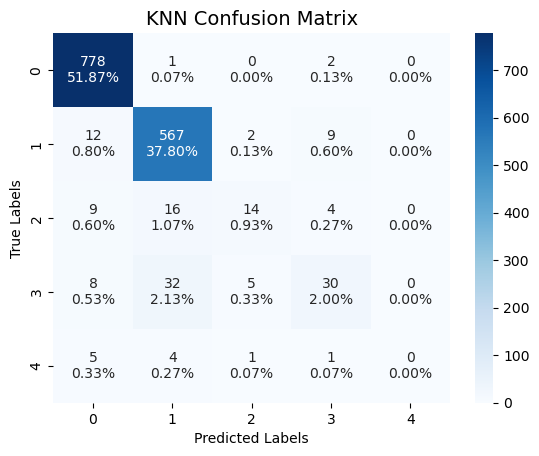

In [14]:
import seaborn as sns

plt.figure(dpi=100)

group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}" for v1, v2, in zip(group_counts,group_percentages)]
labels = np.asarray(labels).reshape(5,5)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

plt.title("KNN Confusion Matrix", fontsize=14)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')